<a href="https://colab.research.google.com/github/ABOSALAH2020/Building-website/blob/master/Hand_writing_digit_tf_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(x_train_raw, y_train_raw) , (x_test_raw, y_test_raw) = datasets.mnist.load_data()

print (y_train_raw[0])
print ((x_train_raw.shape, y_train_raw.shape))
print ((x_test_raw.shape, y_test_raw.shape))

11501568/11490434 [==============================] - 0s 0us/step
5
((60000, 28, 28), (60000,))
((10000, 28, 28), (10000,))


In [3]:
# convert the labeles in one hot-codes
num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)
print (y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<function matplotlib.pyplot.show(*args, **kw)>

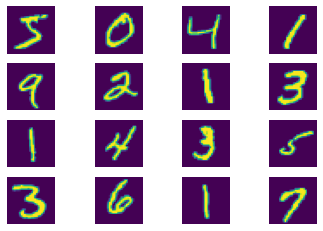

In [4]:
plt.figure()
for i in range(16):
   plt.subplot(4,4,i+1)
   plt.imshow(x_train_raw[i])
   #plt.ylabel(y[i], numpy())
   plt.axis('off')
plt.show

In [5]:
#convert data (28*28)pixel into one vector
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)
x_train.shape

(60000, 784)

In [6]:
#Normalize image pixel values
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [7]:
#creat Deep nueral network (DNN) that consists of three fully connected layers and two RELU activation function 
model =keras.Sequential([
    layers.Dense(512, activation= 'relu' , input_dim = 784),
    layers.Dense(256 , activation = 'relu'),
    layers.Dense(124, activation = 'relu'),
layers.Dense(num_classes , activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 124)               31868     
                                                                 
 dense_3 (Dense)             (None, 10)                1250      
                                                                 
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________


In [8]:
Optimizer = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = Optimizer,
              metrics=['accuracy']
              )

In [9]:
#@title Training { display-mode: "code" }
# Fit the training data to the model by using the fit method
model.fit(x_train , y_train,
          batch_size = 128,
          epochs=10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 7s 5ms/step - loss: 0.2346 - accuracy: 0.9300
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0842 - accuracy: 0.9733
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0552 - accuracy: 0.9828
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0396 - accuracy: 0.9877
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0319 - accuracy: 0.9890
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0246 - accuracy: 0.9921
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0225 - accuracy: 0.9924
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0191 - accuracy: 0.9936
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0176 - accuracy: 0.9940
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0150 - accuracy: 0.9949